#### Previsione del prezzo di Facebook con regressione lineare e support vector machine
Dati scaricati da Quandl

https://www.youtube.com/watch?v=EYnC4ACIt2g&ab_channel=ComputerScience

In [ ]:
pip install quandl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas_datareader.data as web


importiamo i dati

In [ ]:
start_date = '2012-05-18'
end_date = '2018-03-27'
df = web.get_data_yahoo('FB', start_date, end_date) 
#df = quandl.get("WIKI/FB")

In [ ]:
len(df)

1473

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-03-21,173.399994,163.300003,164.800003,169.389999,106598800,169.389999
2018-03-22,170.270004,163.720001,166.130005,164.889999,73743000,164.889999
2018-03-23,166.600006,159.020004,165.440002,159.389999,53609700,159.389999
2018-03-26,161.100006,149.020004,160.820007,160.059998,126116600,160.059998
2018-03-27,162.850006,150.750000,156.309998,152.220001,79117000,152.220001


Selezioniamo la colonna Adj Close

In [ ]:
df = df[['Adj Close']]

In [ ]:
len(df)

1473

In [ ]:
df.head()

,Adj Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


In [ ]:
# Numero di giorni nel futuro che si vogliono prevedere
forecast_out = 1

In [ ]:
# Creiamo una colonna con la variabile da prevedere
df['Prediction'] = df[['Adj Close']].shift(-1)

In [ ]:
df.head()

,Adj Close,Prediction
Date,,
2012-05-18,38.230000,34.029999
2012-05-21,34.029999,31.000000
2012-05-22,31.000000,32.000000
2012-05-23,32.000000,33.029999
2012-05-24,33.029999,31.910000


In [ ]:
df.tail()

,Adj Close,Prediction
Date,,
2018-03-21,169.389999,164.889999
2018-03-22,164.889999,159.389999
2018-03-23,159.389999,160.059998
2018-03-26,160.059998,152.220001
2018-03-27,152.220001,NaN


In [ ]:
df.tail()

,Adj Close,Prediction
Date,,
2018-03-21,169.389999,164.889999
2018-03-22,164.889999,159.389999
2018-03-23,159.389999,160.059998
2018-03-26,160.059998,152.220001
2018-03-27,152.220001,NaN


In [ ]:
# Stabiliamo quanti "n" giorni in avanti vogliamo prevedere
forecast_out = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

In [ ]:
df.head()

,Adj Close,Prediction
Date,,
2012-05-18,38.230000,30.770000
2012-05-21,34.029999,31.200001
2012-05-22,31.000000,31.469999
2012-05-23,32.000000,31.730000
2012-05-24,33.029999,32.169998


In [ ]:
# Creiamo un data set indipendente (X), trasformando il df in un array
X = np.array(df.drop(['Prediction'], 1))

In [ ]:
# Eliminiamo le ultime "n" righe
X = X[:-forecast_out]

In [ ]:
print(X)
# attenzione, abbiamo creato una lista di liste

[[ 38.22999954]
 [ 34.02999878]
 [ 31.        ]
 ...
 [171.58000183]
 [176.11000061]
 [176.41000366]]


In [ ]:
len(X)

1443

In [ ]:
# Creiamo il data set dipendente (y)
# Creiamo un altro array (tutti i valori compresi gli NaN)
y = np.array(df['Prediction'])
print(y)

[30.77000046 31.20000076 31.46999931 ...         nan         nan
         nan]


In [ ]:
# Eliminiamo gli NaN
y = y[:-forecast_out]
print(y)

[ 30.77000046  31.20000076  31.46999931 ... 159.38999939 160.05999756
 152.22000122]


Creiamo i due data set di addestramento e prova (train, test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Creiamo e addestriamo la Support Vector Machine (Regressore)

In [ ]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.1)

In [ ]:
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione,  che indica la percentuale di variabilità nella variable dipendente spiegata dal modello. 

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [ ]:
svm_confindence = svr_rbf.score(x_test, y_test)
print('svm_confindence: ', svm_confindence)

svm_confindence:  0.973938610484426


Creaimo e addestriamo un modello di regressione lineare

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_test, y_test)

LinearRegression()

Testiamo il modello. L'indice di capacità del modello è il coefficiente di determinazione R^2 della previsione, che indica la percentuale di variabilità nella variable dipendente spiegata dal modello.

Il valore di R^2 è compreso fra un minimo di 0 e un massimo di 1

In [ ]:
lr_confindence = lr.score(x_test, y_test)
print('lr_confindence: ', lr_confindence)

lr_confindence:  0.9795718132202585


Creiamo la previsione degli ultimi 30 valori

In [ ]:
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[173.1499939 ]
 [179.52000427]
 [179.96000671]
 [177.36000061]
 [176.00999451]
 [177.91000366]
 [178.99000549]
 [183.28999329]
 [184.92999268]
 [181.46000671]
 [178.32000732]
 [175.94000244]
 [176.61999512]
 [180.3999939 ]
 [179.77999878]
 [183.71000671]
 [182.33999634]
 [185.22999573]
 [184.75999451]
 [181.88000488]
 [184.19000244]
 [183.86000061]
 [185.08999634]
 [172.55999756]
 [168.1499939 ]
 [169.38999939]
 [164.88999939]
 [159.38999939]
 [160.05999756]
 [152.22000122]]


Previsione dei prossimi n valori con il modello di regressione lineare

In [ ]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[176.10835894 182.51843913 182.96120935 180.34484821 178.98635005
 180.89831099 181.98510645 186.31214282 187.96245844 184.47064493
 181.31089374 178.91591771 179.6001878  183.40396422 182.7800691
 186.73479829 185.35617003 188.26434862 187.79139091 184.89328505
 187.21781338 186.88573571 188.12346858 175.51465129 171.07690701
 172.32471262 167.79640589 162.26180877 162.93602149 155.04670856]


Previsione dei prossimi n valori con il modello support vector machine

In [ ]:
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[178.15072218 180.39059781 179.78176465 176.08983236 175.20433416
 178.14008097 180.74917058 185.44092136 175.54829808 183.48135541
 179.59738367 175.34240008 174.68475507 179.63047662 180.01630273
 182.18894285 187.71989876 175.94251379 175.72353553 185.89850549
 178.37053792 180.93522594 175.65218842 176.40307152 170.8469107
 172.78064637 171.81367303 167.32266136 167.8802638  158.22365393]


Qual è la previsione migliore?

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
lr_rmse = sqrt(mean_squared_error(x_forecast, lr_prediction))
print(lr_rmse)

2.9812318483140525


In [ ]:
svm_rmse = sqrt(mean_squared_error(x_forecast, svm_prediction))
print(svm_rmse)

4.908272943797412


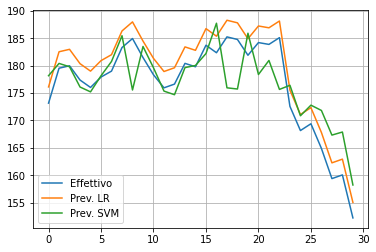

In [ ]:
plt.plot(x_forecast, label = 'Effettivo')
plt.plot(lr_prediction, label = 'Prev. LR')
plt.plot(svm_prediction, label = 'Prev. SVM')
plt.grid(True)
plt.legend();


#### Previsione del prezzo di Ethereum con SVR
https://www.youtube.com/watch?v=HiDEAWdAif0&ab_channel=ComputerScience

In [ ]:
from datetime import date, datetime
plt.style.use('fivethirtyeight')
import pandas_datareader.data as web
import pandas as pd


In [ ]:
start_date = '2021-01-01'
end_date = '2021-05-15'
#end_date = datetime.today()

In [ ]:
df = web.get_data_yahoo('ETH-USD', start_date, end_date) 

In [ ]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,749.201843,719.792236,737.708374,730.367554,13652004358,730.367554
2021-01-02,786.798462,718.109497,730.402649,774.534973,19740771179,774.534973
2021-01-03,1006.565002,771.561646,774.511841,975.507690,45200463368,975.507690
2021-01-04,1153.189209,912.305359,977.058838,1040.233032,56945985763,1040.233032
2021-01-05,1129.371460,986.811279,1041.498779,1100.006104,41535932781,1100.006104


In [ ]:
future_days = 5

In [ ]:
# Creiamo una  nuova colonna con i prezzi futuri

In [ ]:
df[str(future_days) + '_Day_Price_Forecast'] = df[['Close']].shift(-future_days)

In [ ]:
df.tail(7)

,High,Low,Open,Close,Volume,Adj Close,5_Day_Price_Forecast
Date,,,,,,,
2021-05-10,4197.473145,3684.451660,3924.413330,3952.293945,62691789007,3952.293945,3638.122070
2021-05-11,4178.208984,3783.889404,3948.271973,4168.701172,52679737865,4168.701172,3587.506104
2021-05-12,4362.350586,3785.848633,4174.635742,3785.848633,69023382175,3785.848633,NaN
2021-05-13,4032.563477,3549.407227,3828.918457,3715.148438,78398214539,3715.148438,NaN
2021-05-14,4171.017090,3703.399902,3720.122314,4079.057373,48174271215,4079.057373,NaN
2021-05-15,4129.185547,3638.122070,4075.951660,3638.122070,42422321751,3638.122070,NaN
2021-05-16,3878.895996,3350.951660,3641.830811,3587.506104,47359478734,3587.506104,NaN


Creiamo il data set per la previsione

In [ ]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]

In [ ]:
df.shape

(136, 7)

In [ ]:
df.shape[0]

136

In [ ]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])

In [ ]:
y = y[:-future_days]
print(y)

[1207.11218262 1225.67810059 1224.19714355 1281.07727051 1262.2467041
 1090.14538574 1043.43457031 1130.73937988 1218.45300293 1171.83459473
 1233.53759766 1230.17224121 1257.27954102 1377.29589844 1382.27404785
 1121.57092285 1236.51220703 1230.99060059 1391.609375   1324.41479492
 1357.05810547 1253.18713379 1298.10180664 1382.52282715 1376.11547852
 1314.98620605 1369.04052734 1515.19372559 1660.9095459  1594.76269531
 1718.65087891 1677.84680176 1614.2277832  1746.61682129 1768.03503418
 1744.2434082  1783.79797363 1843.53259277 1814.10986328 1805.08410645
 1779.79101562 1781.06750488 1848.45825195 1937.44921875 1960.16479492
 1919.53405762 1935.60107422 1781.99291992 1570.20397949 1626.57568359
 1475.70373535 1446.03369141 1459.97314453 1416.0489502  1564.7076416
 1492.60876465 1575.85314941 1541.91430664 1533.27502441 1654.74157715
 1723.15380859 1834.72790527 1868.04882812 1799.16625977 1826.19494629
 1772.10241699 1924.6854248  1854.56433105 1791.70227051 1806.97180176
 1823.44

Creiamo il data set di addestramento e test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf confidence score is: ', svr_rbf_confidence)

svr_rbf confidence score is:  0.9788204043261906


In [ ]:
svm_prediction = svr_rbf.predict(x_test)

In [ ]:
print(y_test)

[ 89.73000336 107.31999969  89.68000031  60.52000046  27.82999992
  58.56000137 181.25999451  75.19000244 181.46000671  23.70999908
 177.88999939 110.61000061  78.40000153  19.04999924  80.47000122
  58.93999863  58.52999878  53.52999878  54.86000061  78.43000031
  76.80000305  81.52999878  26.12999916  26.13999939  55.04999924
  80.70999908  26.51000023  59.22999954  93.97000122  59.20999908
  63.54999924  96.98999786  43.95000076  77.45999908  89.43000031
  34.36000061  75.76000214  79.22000122  83.01000214  21.95000076
  20.87999916  58.50999832 116.86000061  99.54000092  64.88999939
  38.54999924  45.83000183  18.97999954  76.18000031  30.96999931
  52.68000031 128.63999939  86.66999817 125.05999756  97.91999817
 120.56999969 119.37999725  25.20999908  76.70999908  28.96999931
  64.87000275 106.48999786 176.02999878  26.85000038  76.44999695
  18.97999954 108.76000214 107.12000275  24.65999985  47.06000137
 127.30999756  76.51999664  53.54999924  99.37000275  37.02000046
  94.16000

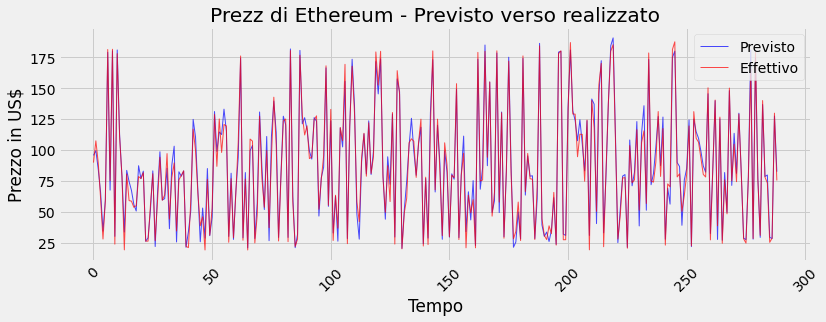

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Previsto', linewidth = '1', color ='b', alpha = .7)
plt.plot(y_test, label = 'Effettivo', linewidth = '1', color ='r', alpha = .7)
plt.title('Prezz di Ethereum - Previsto verso realizzato')
plt.ylabel('Prezzo in US$')
plt.xlabel('Tempo')
plt.legend()
plt.xticks(rotation = 45)
plt.show();
